In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
BACTH_LIST = [1, 10, 100, 1000]
LR_LIST = [0.01, 0.05, 0.1, 0.5, 1, 5]
OPTIMIZER_LIST = ['gd', 'adam', 'adagrad', 'lbfgs', 'adamw']

With produced data

In [228]:
df = pd.read_csv('results2.csv', sep = ',')
df

,optimizer,lr,batch size,num iteration,train loss,train accuracy,test loss,test accuracy,sharpness,non uniformity
0,gd,0.01,1000,7753,0.029343,99.900002,1.007227,78.699997,363.573364,1410.584941
1,adam,0.01,1000,95,0.002759,100.000000,1.602754,79.500000,66.141792,503.700432
2,adagrad,0.01,1000,568,0.003908,99.900002,1.181605,80.699997,69.962860,456.532926
3,lbfgs,0.01,1000,77,0.006605,100.000000,2.112868,78.300003,2975.436035,16716.417800
4,adamw,0.01,1000,141,0.002156,100.000000,2.037582,79.799995,78.135727,717.885241
5,gd,0.05,1000,2451,0.012455,99.900002,1.010540,79.099998,123.581818,616.558417


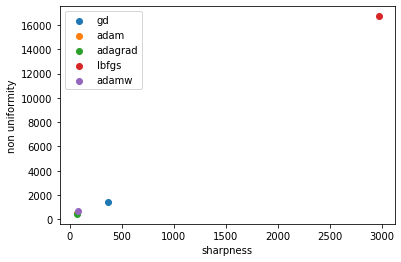

In [227]:
df_001 = df[df['lr'] == 0.01]

for optimizer in OPTIMIZER_LIST:
    plt.scatter(df_001[df_001['optimizer'] == optimizer]['sharpness'], 
                df_001[df_001['optimizer'] == optimizer]['non uniformity'], 
                label = optimizer)
    plt.xlabel('sharpness')
    plt.ylabel('non uniformity')
    plt.legend(loc = 'best')

With fake data

In [3]:
df2 = pd.read_csv('results3.csv', sep = ',')
df2

,optimizer,lr,batch size,sharpness,non uniformity,a,s
0,gd,0.5,1000,3.55,13.12,4,1998.999750
1,gd,0.5,1000,3.77,11.02,4,1998.999750
2,gd,0.5,1000,3.81,11.20,4,1998.999750
3,gd,0.5,1000,3.69,14.66,4,1998.999750
4,gd,0.5,1000,3.34,14.67,4,1998.999750
5,sgd,0.5,25,2.79,5.29,4,316.069613
6,sgd,0.5,25,2.65,9.55,4,316.069613
7,sgd,0.5,25,2.26,9.12,4,316.069613
8,sgd,0.5,25,2.49,5.49,4,316.069613
9,sgd,0.5,25,2.50,5.64,4,316.069613


In [141]:
# COLOR_LIST = ['blue', 'orange', 'green', 'red', 'yellow', 'purple', 'pink']
COLOR_LIST = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C6', 'C7', 'C7', 'C8', 'C9']

In [140]:
def get_sharpness_ub(lr):
    return 2/lr

def get_nonuniformity_ub(lr, n = 1000, B = 1000):
    '''
    n: number of data
    lr: learning rate
    B: batch size
    '''
    return np.sqrt(B*(n-1)/(n-B+1))/lr

In [146]:
# figure5: sharpness and non-uniformity change w.r.t. batch size 

def plot_B(df, lr = 0.1, n = 1000, ymax = 15):
    '''
    plot nonuniformity against sharpness for a fixed learning rate but different batch size
    '''
    df_lr = df[df['lr'] == lr]
    
#     f, ax = plt.subplots(figsize = (5, 4))
    plt.vlines(get_sharpness_ub(lr), 0, ymax, 
               colors = 'gray', linestyles = '-', linewidth = 0.8)
    plt.text(get_sharpness_ub(lr)-0.3, 1, '2/'+r'$\eta$', c='gray')
    i = 0
    for _, optimizer, batch_size in df_lr[['optimizer', 'batch size']].drop_duplicates().itertuples():
        data = df[(df['optimizer'] == optimizer) & (df['batch size'] == batch_size)]
        plt.scatter(data['sharpness train'], data['non uniformity train'],
                    c = COLOR_LIST[i], label = optimizer+', B='+str(batch_size))
        plt.hlines(get_nonuniformity_ub(lr, n = n, B = batch_size), 0, get_sharpness_ub(lr),
                   color = COLOR_LIST[i], linestyles = '--', linewidth = 3)
        i += 1
        if i > 9:
            raise ValueError('color out of range')
    plt.xlabel('sharpness', fontsize = 15)
    plt.ylabel('non-uniformity', fontsize = 15)
    plt.ylim(0, ymax)
    plt.xlim(0, get_sharpness_ub(lr)+0.2)
    plt.legend(loc = 'best')
    plt.savefig('Sharpness vs Nonuniformity for different batch size (lr='+str(lr)+'.pdf')
    
    
def plot_lr(df, batch_size = 10, n = 1000, ymax = 32):
    '''
    plot nonuniformity against sharpness for a fixed batch size but different learning rate
    '''
    df_bs = df[df['batch size'] == batch_size]
    
    i = 0
    for _, optimizer, lr in df_bs[['optimizer', 'lr']].drop_duplicates().itertuples():
        data = df[(df['optimizer'] == optimizer) & (df['lr'] == lr)]
        plt.scatter(data['sharpness'], data['non uniformity'],
                    c = COLOR_LIST[i], label = optimizer+', lr='+str(lr))
        plt.hlines(get_nonuniformity_ub(lr, n = n, B = batch_size), 0, get_sharpness_ub(lr),
                   color = COLOR_LIST[i], linestyles = '--', linewidth = 3)
        plt.vlines(get_sharpness_ub(lr), 0, get_nonuniformity_ub(lr, n = n, B = batch_size), 
                   colors = COLOR_LIST[i], linestyles = '--', linewidth = 3)
        i += 1
        if i > 9:
            raise ValueError('color out of range')
    plt.xlabel('sharpness', fontsize = 15)
    plt.ylabel('non-uniformity', fontsize = 15)
    plt.ylim(0, ymax)
    plt.xlim(0, get_sharpness_ub(lr)+1)
    plt.legend(loc = 'best')
    plt.savefig('Sharpness vs Nonuniformity for different learning rate (bs='+str(batch_size)+'.pdf')

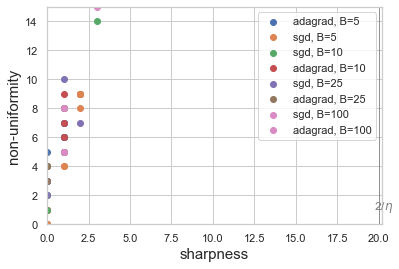

In [147]:
plot_B(df_filtered, lr=0.1)

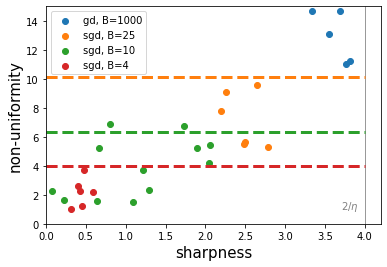

In [220]:
plot_B(df2)

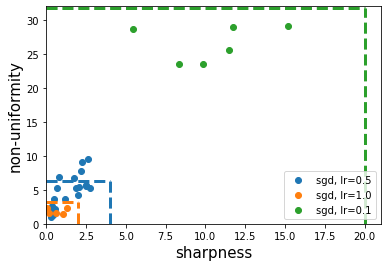

In [221]:
plot_lr(df2)

In [224]:
B = 10
for lr in LR_LIST:
    print('lr = ', lr, 
          ', sharpness = ', round(get_sharpness_ub(lr),2), 
          ', non-uniformity = ', round(get_nonuniformity_ub(lr, B = B),2))

lr =  0.01 , sharpness =  200.0 , non-uniformity =  317.5
lr =  0.05 , sharpness =  40.0 , non-uniformity =  63.5
lr =  0.1 , sharpness =  20.0 , non-uniformity =  31.75
lr =  0.5 , sharpness =  4.0 , non-uniformity =  6.35
lr =  1 , sharpness =  2.0 , non-uniformity =  3.18
lr =  5 , sharpness =  0.4 , non-uniformity =  0.64


In [118]:
def plot_s_bs(df):
     
    df_sgd = df[(df['optimizer'] == 'sgd') | (df['optimizer'] == 'gd')]
    df_plot = pd.DataFrame(columns = ['lr', 'bs', 'sharpness'])
    for lr_bs, value in df_sgd.groupby(['lr', 'batch size']):
        df_plot = df_plot.append({'lr': lr_bs[0], 'bs': int(lr_bs[1]), 'sharpness': round(value.mean()['sharpness'],1)}, ignore_index=True)

#     df_plot['bs'] = df_plot['bs'].astype(int)
    bs_order = [str(i) for i in sorted(list(set(df_plot['bs'])))]
    df_plot['bs'] = df_plot['bs'].astype(str)
    
    lrs = sorted(list(set(df_plot['lr'])))

    plt.plot(bs_order, [0 for i in range(len(bs_order))], color = 'white')
    for lr in lrs:
        data = df_plot[df_plot['lr'] == lr]
        plt.plot(data['bs'], data['sharpness'], marker='o', label = lr)
    plt.xlabel('batch size', fontsize = 12)
    plt.ylabel('sharpness', fontsize = 12)
    plt.legend()
    plt.savefig('sharpness vs batch size.pdf')

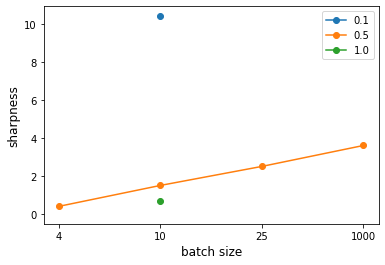

In [119]:
plot_bs_s(df2)

In [128]:
df2.groupby(['lr', 'batch size'])

In [27]:
def get_sharpness_ub(learning_rate):
    return 2/learning_rate

def plot_s_lr(df, batch_size = 'all'):
    if batch_size == 'all':
        df_plot = df.groupby(['optimizer'])
    elif batch_size not in df['batch size']:
        raise ValueError('no such batch size')
    else:
        df_plot = df[df['batch size'] == batch_size].groupby(['optimizer'])
        
    for optimizer, values in df_plot:
        plt.scatter(values['lr'], values['sharpness train'], label = optimizer)#, s = values['batch size'])
    
    lr_max = df_plot['lr'].max()
    ymax = df_plot['sharpness train'].max().max() + 5
    plt.plot([lr for lr in np.linspace(.0005, lr_max)], [get_sharpness_ub(lr) for lr in np.linspace(.0005, lr_max)], 'k--', label = 'condition')
    plt.ylim(0, ymax)
    plt.xlabel('learning rate', fontsize = 12)
    plt.ylabel('sharpness', fontsize = 12)
    plt.savefig('sharpness against learning rate')
    plt.legend()

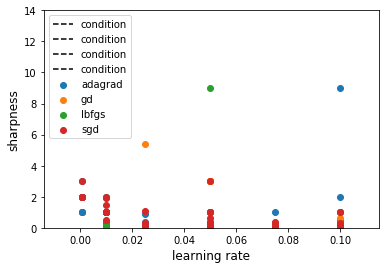

In [28]:
plot_s_lr(df_filtered)

In [180]:
100 not in df2['batch size']

True

In [99]:
a['bs'] = a['bs'].astype(int)
bs_order = list(set(a['bs']))
a.sort_values(by = ['lr', 'bs'], inplace = True, ascending = [False, False])
a['bs'] = a['bs'].astype(str)
type(a['bs'][0])

str

In [107]:
[str(i) for i in sorted(bs_order)]

['4', '10', '25', '1000']

In [88]:
set(a['bs'])

{'10', '1000', '25', '4'}

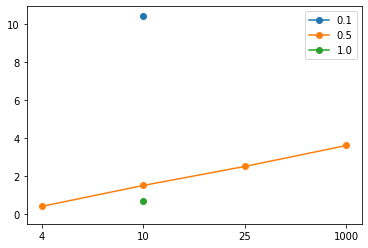

In [103]:
lrs = [0.1, 0.5, 1.0]

plt.plot(['4', '10', '25', '1000'], [0,0,0,0], color = 'white')
for lr in lrs:
    data = a[a['lr'] == lr]
    plt.plot(data['bs'], data['sharpness'], marker='o', label = lr)
    plt.legend()

In [33]:
df3 = pd.DataFrame(columns = ['lr', 'bs', 'sharpness'])
for lr_bs, value in df2.groupby(['lr', 'batch size']):
    print({'lr': lr_bs[0], 'bs': lr_bs[1], 'sharpness': value.mean()['sharpness']})
    df3.append({'lr': lr_bs[0], 'bs': lr_bs[1], 'sharpness': value.mean()['sharpness']}, ignore_index=True)

{'lr': 0.1, 'bs': 10, 'sharpness': 10.35}
{'lr': 0.5, 'bs': 4, 'sharpness': 0.445}
{'lr': 0.5, 'bs': 10, 'sharpness': 1.4871428571428573}
{'lr': 0.5, 'bs': 25, 'sharpness': 2.481666666666667}
{'lr': 0.5, 'bs': 1000, 'sharpness': 3.632}
{'lr': 1.0, 'bs': 10, 'sharpness': 0.662}


In [32]:
df3

,lr,bs,sharpness


speed of convergence

In [3]:
df = pd.read_csv('results.csv', sep = ',')
df

,optimizer,lr,batch size,num iteration,duration,train loss,train accuracy,test loss,test accuracy,sharpness train,non uniformity train,sharpness test,non uniformity test
0,sgd,0.001,10,2050,0,0.00096,100.000000,1.50893,81.050003,32,4817,189,865
1,adagrad,0.001,10,1850,0,0.00098,100.000000,1.18753,82.900002,13,94,391,2780
2,sgd,0.010,10,250,0,0.00070,100.000000,1.40029,82.500000,7,82,151,1402
3,adam,0.010,1000,400,44,0.00002,100.000000,1.16743,90.150002,0,1,61,904
4,adagrad,0.010,1000,400,40,0.00813,99.900002,0.43613,91.299995,14,111,34,301
...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,sgd,0.100,5,200,190,0.00003,100.000000,1.71445,82.600000,0,0,0,0
112,adagrad,0.100,5,400,835,0.00005,100.000000,2.35578,80.900000,0,1,0,0
113,sgd,0.050,5,200,199,0.00005,100.000000,1.66071,82.800000,0,1,0,0
114,adagrad,0.050,5,200,392,0.00008,100.000000,1.77036,82.700000,0,3,0,0


In [4]:
df.drop(['sharpness test', 'non uniformity test'], axis = 1, inplace = True)

In [5]:
df

,optimizer,lr,batch size,num iteration,duration,train loss,train accuracy,test loss,test accuracy,sharpness train,non uniformity train
0,sgd,0.001,10,2050,0,0.00096,100.000000,1.50893,81.050003,32,4817
1,adagrad,0.001,10,1850,0,0.00098,100.000000,1.18753,82.900002,13,94
2,sgd,0.010,10,250,0,0.00070,100.000000,1.40029,82.500000,7,82
3,adam,0.010,1000,400,44,0.00002,100.000000,1.16743,90.150002,0,1
4,adagrad,0.010,1000,400,40,0.00813,99.900002,0.43613,91.299995,14,111
...,...,...,...,...,...,...,...,...,...,...,...
111,sgd,0.100,5,200,190,0.00003,100.000000,1.71445,82.600000,0,0
112,adagrad,0.100,5,400,835,0.00005,100.000000,2.35578,80.900000,0,1
113,sgd,0.050,5,200,199,0.00005,100.000000,1.66071,82.800000,0,1
114,adagrad,0.050,5,200,392,0.00008,100.000000,1.77036,82.700000,0,3


In [101]:
df_filtered = df[(df['train loss']<1e-3) & (df['optimizer']!='adam')]
df_filtered

,optimizer,lr,batch size,num iteration,duration,train loss,train accuracy,test loss,test accuracy,sharpness train,non uniformity train
0,sgd,0.001,10,2050,0,0.00096,100.0,1.50893,81.050003,32,4817
1,adagrad,0.001,10,1850,0,0.00098,100.0,1.18753,82.900002,13,94
2,sgd,0.010,10,250,0,0.00070,100.0,1.40029,82.500000,7,82
15,sgd,0.050,25,170,72,0.00096,100.0,1.18224,82.100000,3,30
16,lbfgs,0.050,1000,400,559,0.00000,100.0,8.68567,79.800000,0,1
...,...,...,...,...,...,...,...,...,...,...,...
111,sgd,0.100,5,200,190,0.00003,100.0,1.71445,82.600000,0,0
112,adagrad,0.100,5,400,835,0.00005,100.0,2.35578,80.900000,0,1
113,sgd,0.050,5,200,199,0.00005,100.0,1.66071,82.800000,0,1
114,adagrad,0.050,5,200,392,0.00008,100.0,1.77036,82.700000,0,3


In [8]:
import seaborn as sns

In [102]:
# df_plot = df_filtered[(df_filtered['optimizer'] == 'sgd') | (df_filtered['optimizer'] == 'gd')]
# df_plot = df_plot[df_plot['lr'] != 0.001]
# df_plot = df_plot[(df_plot['batch size'] != 1000) & (df_plot['batch size'] != 100)]
df_plot = df_filtered[['optimizer', 'lr', 'batch size', 'duration', 'num iteration']]
df_plot

,optimizer,lr,batch size,duration,num iteration
0,sgd,0.001,10,0,2050
1,adagrad,0.001,10,0,1850
2,sgd,0.010,10,0,250
15,sgd,0.050,25,72,170
16,lbfgs,0.050,1000,559,400
...,...,...,...,...,...
111,sgd,0.100,5,190,200
112,adagrad,0.100,5,835,400
113,sgd,0.050,5,199,200
114,adagrad,0.050,5,392,200


In [59]:
set(df_plot['optimizer'])

{'adagrad', 'adam', 'gd', 'lbfgs', 'sgd'}

In [50]:
# df_plot['batch size'] = df_plot['batch size'].astype(str)
# df_plot['lr'] = df_plot['lr'].astype(str)
# df_plot['sharpness train'] = df_plot['sharpness train'].astype(float)

TypeError: unsupported operand type(s) for /: 'str' and 'int'

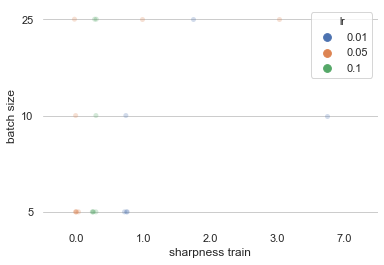

In [51]:
# Initialize the figure
f, ax = plt.subplots()
sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
sns.stripplot(x="sharpness train", y="batch size", hue="lr",
              data=df_plot, dodge=True, alpha=.25, zorder=1)

# Show the conditional means
sns.pointplot(x="sharpness train", y="batch size", hue="lr",
              data=df_plot, dodge=.532, join=False, palette="dark", 
              markers="d", scale=.75, ci=None)

# Improve the legend 
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[3:], labels[3:], title="lr",
          handletextpad=0, columnspacing=1,
          loc="lower right", ncol=3, frameon=True)

In [66]:
df_plot.groupby(['batch size', 'lr']).count()

optimizer  duration  num iteration
batch size lr                                       
5          0.001          7         7              7
           0.010          6         6              6
           0.050          8         8              8
           0.100          8         8              8
10         0.001          4         4              4
           0.010          4         4              4
           0.050          3         3              3
           0.100          2         2              2
25         0.010          3         3              3
           0.050          5         5              5
           0.100          4         4              4
100        0.010          1         1              1
           0.050          2         2              2
           0.100          2         2              2
1000       0.001          3         3              3
           0.010          5         5              5
           0.050         10        10             10

In [68]:
df_lr005_bs1000 = df_plot[(df_plot['lr'] == 0.05) & (df_plot['batch size'] == 1000)]
df_lr005_bs1000

,optimizer,lr,batch size,duration,num iteration
16,lbfgs,0.05,1000,559,400
28,gd,0.05,1000,909,9999
29,lbfgs,0.05,1000,712,400
30,adagrad,0.05,1000,433,4800
49,gd,0.05,1000,867,9999
50,lbfgs,0.05,1000,961,400
51,adagrad,0.05,1000,559,6400
88,gd,0.05,1000,634,9999
107,gd,0.05,1000,1282,9999
108,lbfgs,0.05,1000,477,200


adagrad
lbfgs
gd


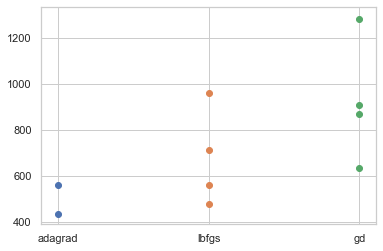

In [73]:
for optimizer in set(df_lr005_bs1000['optimizer']):
    print(optimizer)
    data = df_lr005_bs1000[df_lr005_bs1000['optimizer'] == optimizer]
    plt.scatter(data['optimizer'], data['duration'], label = 'optimizer')

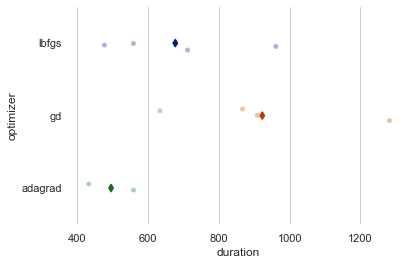

In [97]:
# Initialize the figure
f, ax = plt.subplots()
sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
sns.stripplot(x="duration", y="optimizer",
              data=df_lr005_bs1000, dodge=True, alpha=.5, zorder=1)

# Show the conditional means
sns.pointplot(x="duration", y="optimizer", 
              data=df_lr005_bs1000, dodge=.532, join=False, palette="dark", 
              markers="d", scale=.75, ci=None)


In [103]:
df_bs1000 = df_plot[(df_plot['batch size'] == 1000)]
df_bs1000

,optimizer,lr,batch size,duration,num iteration
16,lbfgs,0.050,1000,559,400
25,lbfgs,0.010,1000,1101,400
27,adagrad,0.010,1000,150,1600
28,gd,0.050,1000,909,9999
29,lbfgs,0.050,1000,712,400
30,adagrad,0.050,1000,433,4800
31,adagrad,0.001,1000,879,9999
49,gd,0.050,1000,867,9999
50,lbfgs,0.050,1000,961,400
51,adagrad,0.050,1000,559,6400


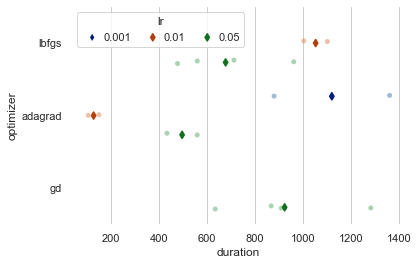

In [105]:
# Initialize the figure
f, ax = plt.subplots()
sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
sns.stripplot(x="duration", y="optimizer", hue="lr",
              data=df_bs1000, dodge=True, alpha=.5, zorder=1)

# Show the conditional means
sns.pointplot(x="duration", y="optimizer", hue="lr",
              data=df_bs1000, dodge=.532, join=False, palette="dark", 
              markers="d", scale=.75, ci=None)

# Improve the legend 
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[3:], labels[3:], title="lr",
          handletextpad=0, columnspacing=1,
          loc="best", ncol=3, frameon=True)

In [126]:
def optimizer_vs_duration__lr(df, batch_size):
    
    df_plot = df[df['batch size'] == batch_size]
    title = 'optimizer vs duration (batch size='+str(batch_size)+')'
    
    # Initialize the figure
    f, ax = plt.subplots()
    sns.despine(bottom=True, left=True)

    # Show each observation with a scatterplot
    sns.stripplot(x="duration", y="optimizer", hue="lr",
                  data=df_plot, dodge=True, alpha=.5, zorder=1).set_title(title)

    # Show the conditional means
    sns.pointplot(x="duration", y="optimizer", hue="lr",
                  data=df_plot, dodge=.532, join=False, palette="dark", 
                  markers="d", scale=.75, ci=None)

    # Improve the legend 
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[3:], labels[3:], title="lr",
              handletextpad=0, columnspacing=1,
              loc="best", ncol=3, frameon=True)
#     ax.title('optimizer vs duration (batch size='+str(batch_size))

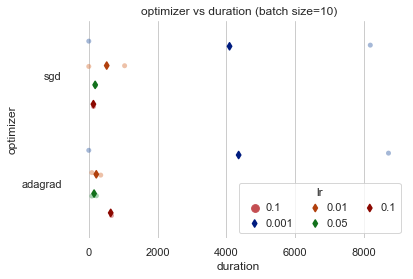

In [129]:
optimizer_vs_duration__lr(df_plot, 10)

In [130]:
def optimizer_vs_duration__bs(df, lr):
    df_plot = df[df['lr'] == lr]
    
    # Initialize the figure
    f, ax = plt.subplots()
    sns.despine(bottom=True, left=True)

    # Show each observation with a scatterplot
    sns.stripplot(x="duration", y="optimizer", hue="batch size",
                  data=df_plot, dodge=True, alpha=.5, zorder=1)

    # Show the conditional means
    sns.pointplot(x="duration", y="optimizer", hue="batch size",
                  data=df_plot, dodge=.532, join=False, palette="dark", 
                  markers="d", scale=.75, ci=None)

    # Improve the legend 
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[3:], labels[3:], title="batch size",
              handletextpad=0, columnspacing=1,
              loc="best", ncol=3, frameon=True)

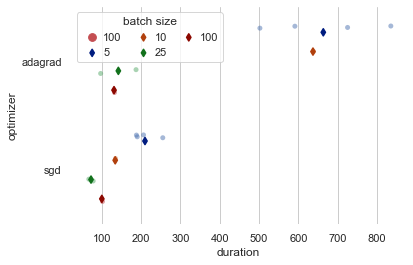

In [131]:
optimizer_vs_duration__bs(df_plot, 0.1)

In [133]:
df[df['train loss'] <1e-3].count()

optimizer               77
lr                      77
batch size              77
num iteration           77
duration                77
train loss              77
train accuracy          77
test loss               77
test accuracy           77
sharpness train         77
non uniformity train    77
dtype: int64

In [134]:
df[df['train loss'] <1e-4].count()

optimizer               19
lr                      19
batch size              19
num iteration           19
duration                19
train loss              19
train accuracy          19
test loss               19
test accuracy           19
sharpness train         19
non uniformity train    19
dtype: int64

KeyError: 'sharpness'

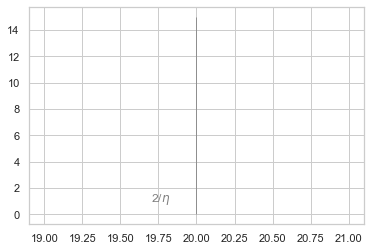

In [142]:
plot_B(df_plot, lr=0.1)

In [13]:
df = pd.read_csv('results.csv', sep=',')
df_filtered = df[(df['train loss']<=5e-4) & (df['optimizer']!='adam')]
df_filtered

,optimizer,lr,batch size,num iteration,duration,train loss,train accuracy,test loss,test accuracy,sharpness train,non uniformity train,sharpness test,non uniformity test
16,lbfgs,0.05,1000,400,559,0.00000,100.0,8.68567,79.8,0.0,1.0,0,0
17,adagrad,0.01,5,164,415,0.00010,100.0,1.55766,83.3,1.0,6.0,0,0
18,sgd,0.01,5,604,848,0.00010,100.0,1.63521,82.1,1.0,4.0,0,0
19,sgd,0.05,5,150,212,0.00010,100.0,1.50861,82.6,0.0,1.0,0,0
20,adagrad,0.05,5,186,474,0.00010,100.0,2.11944,82.4,0.0,5.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,sgd,0.05,25,801,211,0.00007,100.0,1.58438,82.5,0.3,2.3,0,0
156,adagrad,0.05,25,201,76,0.00006,100.0,1.66054,83.1,0.3,2.9,0,0
157,adagrad,0.01,25,201,78,0.00008,100.0,1.55818,83.2,0.4,3.9,0,0
158,sgd,0.01,25,3601,924,0.00010,100.0,1.78629,81.1,1.5,6.6,0,0


In [14]:
df_count = pd.DataFrame(columns=['op', 'lr', 'bs', 'count'])

In [16]:
for index, count in df.groupby(['optimizer', 'lr', 'batch size']):
    df_count = df_count.append({'op': index[0], 'lr': index[1], 'bs': index[2], 'count': count['lr'].count()}, ignore_index=True)
#     print('optimizer = ', index[0], ', lr = ', index[1], ', bs = ', index[2], ', count = ', count['lr'].count())

In [17]:
df_count

,op,lr,bs,count
0,adagrad,0.001,5,5
1,adagrad,0.001,10,3
2,adagrad,0.001,25,1
3,adagrad,0.001,100,1
4,adagrad,0.001,1000,4
...,...,...,...,...
64,sgd,0.100,5,6
65,sgd,0.100,10,4
66,sgd,0.100,25,3
67,sgd,0.100,50,1
